## Sentiment Analysis — Workbook Solutions

In this notebook, we're going to learn how to use [VADER](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner), a sentiment analysis tool designed for social media. (Read the VADER paper [here](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122).)

We're going to see how well VADER works with our own sentences and with sentences from *The House on Mango Street*. Can we create an accurate plot arc of Sandra Cisneros's coming-of-age novel?

*Don't forget to rename this notebook if you want to save changes!*

---

## Install and Import Libraries/Packages

Import Pandas and set Pandas display column width to 400 characters

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 400

Install [vaderSentiment package](https://github.com/cjhutto/vaderSentiment) with pip

In [10]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/melaniewalsh/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


Import the `SentimentIntensityAnalyser` and initlaize it

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

## Calculate Sentiment Scores

To calculate sentiment scores for a sentence or paragraph, we can use the `.polarity_scores()` method.

In [412]:
sentimentAnalyser.polarity_scores("I like the Marvel movies")

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

In [391]:
sentimentAnalyser.polarity_scores("I don't like the Marvel movies")

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.5334}

In [392]:
sentimentAnalyser.polarity_scores("I don't *not* like the Marvel movies")

{'neg': 0.255, 'neu': 0.546, 'pos': 0.199, 'compound': -0.1307}

## Your Turn!

Try out the `sentimentAnalyzer` on some sentences of your own!

Experiment with capitalization, punctuation, emojis, historical words, slangy language, poetry, or non-English words. How does VADER handle it? What does VADER seem to do well and not so well?

In [393]:
#Your code here

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

In [ ]:
#Your code here

## Calculate Sentiment Scores for *The House on Mango Street*

To calculate sentiment scores for *The House on Mango Street*, we first need a quick-and-easy way to break the novel up into sentences.

### Install and Import NLTK

Install [NLTK](https://www.nltk.org/), a Python library for text analysis natural language processing

In [266]:
!pip install nltk

You should consider upgrading via the '/Users/melaniewalsh/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


Import nltk and download the model that will help us get sentences

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/melaniewalsh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Load Text and Break Into Sentences

Read in the text file for "Hairs"

In [414]:
text_file = "../texts/literature/House-on-Mango-Street/02-Hairs.txt"
chapter = open(text_file, encoding="utf-8").read()

To break a string into individual sentences, we can use `nltk.sent_tokenize()`

In [415]:
nltk.sent_tokenize(chapter)

['Hairs\n\nEverybody in our family has different hair.',
 'My Papa’s hair is like a broom, all up in the air.',
 'And me, my hair is lazy.',
 'It never obeys barrettes or bands.',
 'Carlos’ hair is thick and straight.',
 'He doesn’t need to comb it.',
 'Nenny’s hair is slippery—slides out of your hand.',
 'And Kiki, who is the youngest, has hair like fur.',
 'But my mother’s hair, my mother’s hair, like little rosettes, like little candy circles all curly and pretty because she pinned it in pincurls all day, sweet to put your nose into when she is holding you, holding you and you feel safe, is the warm smell of bread before you bake it, is the smell when she makes room for you on her side of the bed still warm with her skin, and you sleep near her, the rain outside falling and Papa snoring.',
 'The snoring, the rain, and Mama’s hair that smells like bread.']

In [269]:
sentences = nltk.sent_tokenize(chapter)

### Calculate Scores for Each Sentence

We can loop through the sentences and calculate sentiment scores for every sentence.

*How would we print just the "compound" score for each sentence?*

In [417]:
for sentence in sentences:
    scores = sentimentAnalyser.polarity_scores(sentence)
    
    print(sentence, '\n', scores, '\n')

Hairs

Everybody in our family has different hair. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

My Papa’s hair is like a broom, all up in the air. 
 {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612} 

And me, my hair is lazy. 
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.3612} 

It never obeys barrettes or bands. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

Carlos’ hair is thick and straight. 
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263} 

He doesn’t need to comb it. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

Nenny’s hair is slippery—slides out of your hand. 
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939} 

And Kiki, who is the youngest, has hair like fur. 
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612} 

But my mother’s hair, my mother’s hair, like little rosettes, like little candy circles all curly and pretty because she pinned it in pincurls all day, sweet to put your nose

### Make DataFrame

A convenient way to make a DataFrame is to first make a list of dictionaries.

Below we loop through the sentences, calculate sentiment scores, and then create a mini-dictionary with the sentence and compound score, which we append to the list `sentence_scores`.

In [418]:
sentence_scores = []
for sentence in sentences:
    scores = sentimentAnalyser.polarity_scores(sentence)
    sentence_scores.append({'sentence': sentence, 'score': scores['compound']})

To make this list of dictionaries into a DataFrame, we can simply use `pd.DataFrame()`

In [419]:
pd.DataFrame(sentence_scores)

,sentence,score
0,Hairs\n\nEverybody in our family has different hair.,0.0000
1,"My Papa’s hair is like a broom, all up in the air.",0.3612
2,"And me, my hair is lazy.",-0.3612
3,It never obeys barrettes or bands.,0.0000
4,Carlos’ hair is thick and straight.,0.2263
5,He doesn’t need to comb it.,0.0000
6,Nenny’s hair is slippery—slides out of your hand.,0.4939
7,"And Kiki, who is the youngest, has hair like fur.",0.3612
8,"But my mother’s hair, my mother’s hair, like little rosettes, like little candy circles all curly and pretty because she pinned it in pincurls all day, sweet to put your nose into when she is holding you, holding you and you feel safe, is the warm smell of bread before you bake it, is the smell when she makes room for you on her side of the bed still warm with her skin, and you sleep near her,...",0.9684
9,"The snoring, the rain, and Mama’s hair that smells like bread.",0.3612


Let's examine the sentences from negative to positive sentiment scores.

In [420]:
hairs_df = pd.DataFrame(sentence_scores)
hairs_df.sort_values(by='score')

,sentence,score
2,"And me, my hair is lazy.",-0.3612
0,Hairs\n\nEverybody in our family has different hair.,0.0000
3,It never obeys barrettes or bands.,0.0000
5,He doesn’t need to comb it.,0.0000
4,Carlos’ hair is thick and straight.,0.2263
1,"My Papa’s hair is like a broom, all up in the air.",0.3612
7,"And Kiki, who is the youngest, has hair like fur.",0.3612
9,"The snoring, the rain, and Mama’s hair that smells like bread.",0.3612
6,Nenny’s hair is slippery—slides out of your hand.,0.4939
8,"But my mother’s hair, my mother’s hair, like little rosettes, like little candy circles all curly and pretty because she pinned it in pincurls all day, sweet to put your nose into when she is holding you, holding you and you feel safe, is the warm smell of bread before you bake it, is the smell when she makes room for you on her side of the bed still warm with her skin, and you sleep near her,...",0.9684


### Calculate Sentiment Scores By Chapter

To calculate sentiment scores for the sentences in each chapter of *The House on Mango Street*, we need to read in each file indviidually.

Below we will import `glob` and `Path`, which will allow us to get all the filenames for the chapters and extract the titles.

In [432]:
import glob
from pathlib import Path

Create a list of filenames for every `.txt` file in the directory

In [435]:
directory_path = "../texts/literature/House-on-Mango-Street/"
text_files = glob.glob(f"{directory_path}/*.txt")

Loop through each file in the "House on Mango Street" directory, calculate sentiment scores, and make a list of dictionaries

In [436]:
sentence_scores = []

# Loop through all the filenames
for text_file in text_files:
    
    #Read in the file
    chapter = open(text_file, encoding="utf-8").read()
    #Extract the end of the filename
    title = Path(text_file).stem
    
    #Loop through each sentence in the 
    for sentence in nltk.sent_tokenize(chapter):
        #Calculate sentiment scores for sentence
        scores = sentimentAnalyser.polarity_scores(sentence)
        
        #Make mini-dictionary with chapter name, sentence, and sentiment score
        sentence_scores.append({'chapter': title,
                                'sentence': sentence,
                                'score': scores['compound']})

Let's create a DataFrame from our list of dictionaries

In [437]:
chapter_df = pd.DataFrame(sentence_scores)
# Make the DataFrame alphabetical by chapter
chapter_df = chapter_df.sort_values(by='chapter')

How would we examine the most negative 15 sentences?

In [438]:
chapter_df.sort_values(by='score')[:15]

,chapter,sentence,score
1028,17-The-Family-of-Little-Feet,"Bum man is yelling something to the air but by now we are running fast and far away, our high heel shoes taking us all the way down the avenue and around the block, past the ugly cousins, past Mr. Benny’s, up Mango Street, the back way, just in case.",-0.8519
0,23-Born-Bad,Born Bad\n\n\nMost likely I will go to hell and most likely I deserve to be there.,-0.8442
1305,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"Papa\n\nWho Wakes Up\n\nTired\n\nin the Dark\n\n\nYour abuelito is dead, Papa says early one morning in my room.",-0.8020
173,12-Those-Who-Don’t,They are stupid people who are lost and got here by mistake.,-0.7964
426,13-There-Was-an-Old-Woman-She-Had-So-Many-Children-She-Didn’t-Know-What-to-Do,But after a while you get tired of being worried about kids who aren’t even yours.,-0.7684
315,16-And-Some-More,"Anita, Stella, Dennis, and Lolo …\n\nWho you calling ugly, ugly?",-0.7650
565,18-A-Rice-Sandwich,"she said, pointing to a row of ugly three-flats, the ones even the raggedy men are ashamed to go into.",-0.7506
422,13-There-Was-an-Old-Woman-She-Had-So-Many-Children-She-Didn’t-Know-What-to-Do,"They are bad those Vargases, and how can they help it with only one mother who is tired all the time from buttoning and bottling and babying, and who cries every day for the man who left without even leaving a dollar for bologna or a note explaining how come.",-0.7506
47,23-Born-Bad,I hated to go there alone.,-0.7351
957,06-Our-Good-Day,"Past my house, sad and red and crumbly in places, past Mr. Benny’s grocery on the corner, and down the avenue which is dangerous.",-0.7351


How would we examine the most positive 15 sentences?

In [439]:
chapter_df.sort_values(by='score', ascending=False)[:15]

,chapter,sentence,score
1216,02-Hairs,"But my mother’s hair, my mother’s hair, like little rosettes, like little candy circles all curly and pretty because she pinned it in pincurls all day, sweet to put your nose into when she is holding you, holding you and you feel safe, is the warm smell of bread before you bake it, is the smell when she makes room for you on her side of the bed still warm with her skin, and you sleep near her,...",0.9684
817,31-Rafaela-Who-Drinks-Coconut-&-Papaya-Juice-on-Tuesdays,"Rafaela who drinks and drinks coconut and papaya juice on Tuesdays and wishes there were sweeter drinks, not bitter like an empty room, but sweet sweet like the island, like the dance hall down the street where women much older than her throw green eyes easily like dice and open homes with keys.",0.9677
526,18-A-Rice-Sandwich,But Nenny says she doesn’t want to eat at school—ever—because she likes to go home with her best friend Gloria who lives across the schoolyard.,0.9455
732,32-Sally,"The boys at school think she’s beautiful because her hair is shiny black like raven feathers and when she laughs, she flicks her hair back like a satin shawl over her shoulders and laughs.",0.9360
1001,17-The-Family-of-Little-Feet,"Rachel says yes, and Lucy says yes, and yes I say, these are the best shoes.",0.9062
1354,05-Cathy-Queen-of-Cats,Cathy’s father will have to fly to France one day and find her great great distant grand cousin on her father’s side and inherit the family house.,0.9042
1327,05-Cathy-Queen-of-Cats,"Cathy\n\nQueen of Cats\n\n\nShe says, I am the great great grand cousin of the queen of France.",0.9042
671,11-Marin,"Marin says that if she stays here next year, she’s going to get a real job downtown because that’s where the best jobs are, since you always get to look beautiful and get to wear nice clothes and can meet someone in the subway who might marry you and take you to live in a big house far away.",0.8979
304,16-And-Some-More,"Well, there’s these already that look like shaving cream …\n\nAnd what about the kind that looks like you combed its hair?",0.8591
1206,07-Laughter,"Rachel and Lucy look at me like I’m crazy, but before they can let out a laugh, Nenny says: Yes, that’s Mexico all right.",0.8591


### Make a Plot Arc

To create a data visualization of sentiment over the course of *The House on Mango Street*, we first need to calculate the average sentiment for each chapter.

In [371]:
chapter_df.groupby('chapter')['score'].mean()

chapter
01-The-House-on-Mango-Street                                                     0.041836
02-Hairs                                                                         0.241100
03-Boys-&-Girls                                                                  0.242573
04-My-Name                                                                       0.127677
05-Cathy-Queen-of-Cats                                                           0.113374
06-Our-Good-Day                                                                  0.127275
07-Laughter                                                                      0.313938
08-Gil’s-Furniture-Bought-&-Sold                                                 0.112105
09-Meme-Ortiz                                                                    0.032085
10-Louie,-His-Cousin-&-His-Other-Cousin                                          0.067255
11-Marin                                                                         0.143275
12

In [374]:
chapter_means = chapter_df.groupby('chapter')['score'].mean().reset_index()

#### Bar Chart

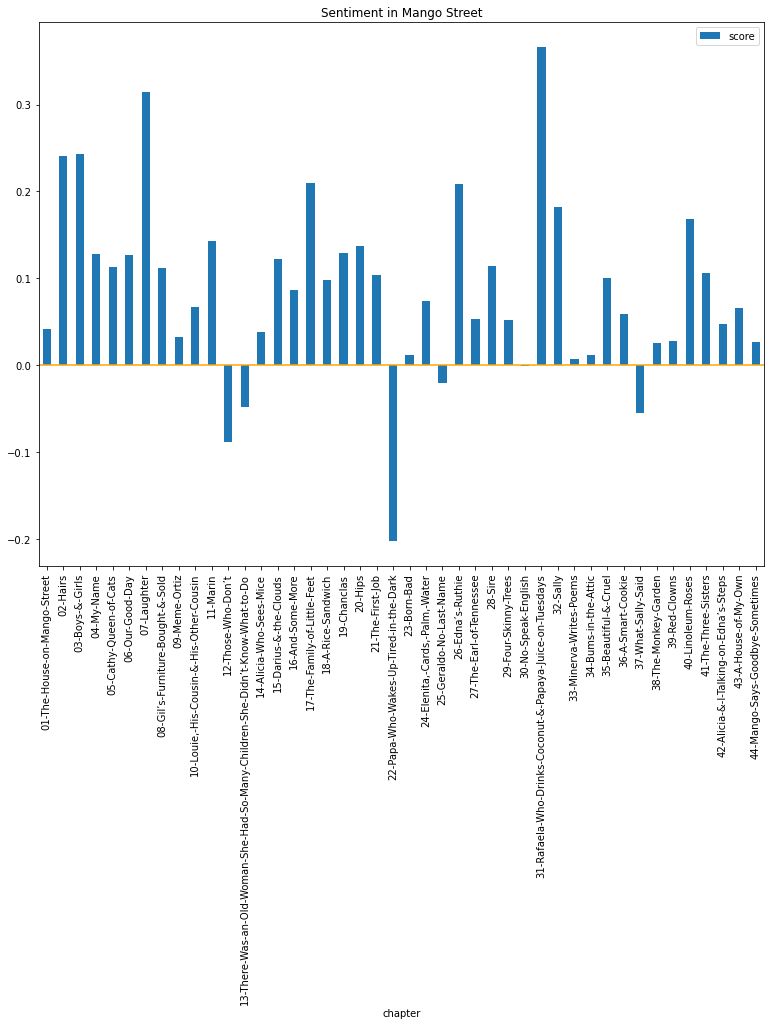

In [431]:
ax = chapter_means.plot(x='chapter', y='score', kind='bar',
                        figsize=(13,10), rot=90, title='Sentiment in Mango Street')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-')

#### Line Chart

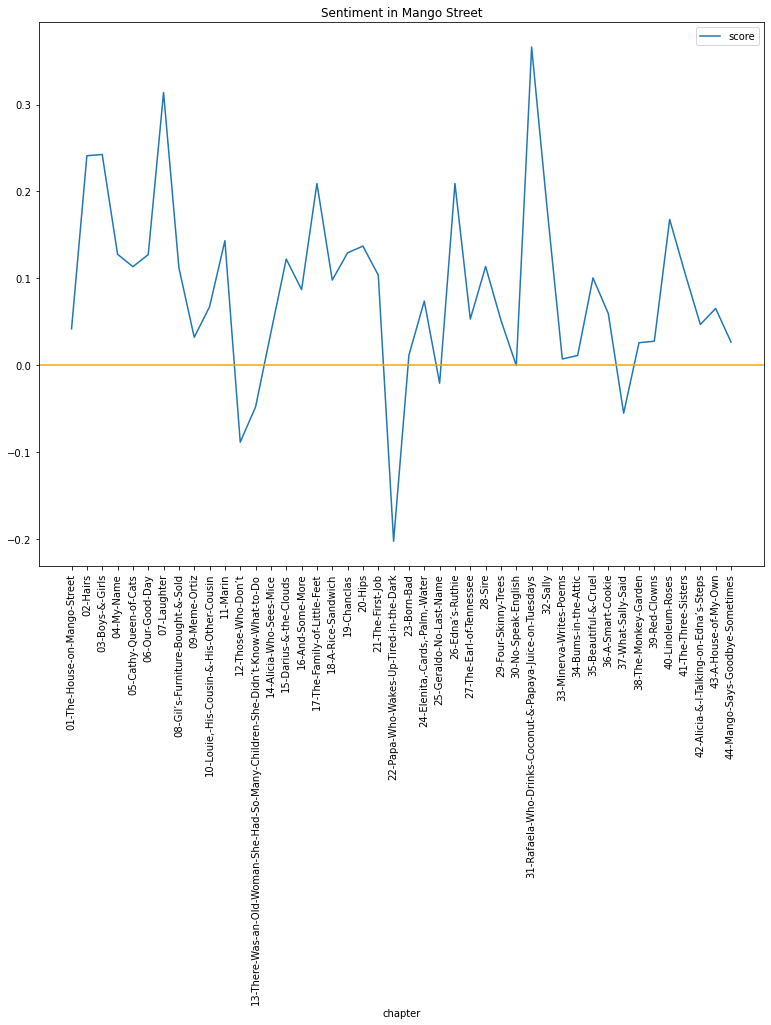

In [430]:
ax = chapter_means.plot(x='chapter', y='score', kind='line',
                        figsize=(13,10), rot=90, title='Sentiment in Mango Street')

#Not all xtick labels will show up in a line plot by default, so we have to make it explicit
ax.set_xticks(range(0, 44))
ax.set_xticklabels(chapter_means['chapter'].unique())

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-')
plt.show()

### Your Turn! 

How do these plot arcs align with your reading experience of *The House on Mango Street*? Examine some specific chapters and sentences below, and discuss how well VADER seems to be working or not working.

*Note: if you want to read the sentences in order, you can use the `.sort_index()` method*

In [424]:
chapter_df[chapter_df['chapter'].str.contains('Papa-Who')]

,chapter,sentence,score,rolling_mean
1305,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"Papa\n\nWho Wakes Up\n\nTired\n\nin the Dark\n\n\nYour abuelito is dead, Papa says early one morning in my room.",-0.8020,0.115703
1314,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,I hold my Papa in my arms.,0.0000,0.102307
1313,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,And I think if my own Papa died what would I do.,-0.5574,0.083727
1312,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"My Papa, his thick hands and thick shoes, who wakes up tired in the dark, who combs his hair with water, drinks his coffee, and is gone before we wake, today is sitting on my bed.",-0.4404,0.057007
1311,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,I will have to tell them to be quiet today.,0.0000,0.044967
1309,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"Because I am the oldest, my father has told me first, and now it is my turn to tell the others.",0.0000,0.019467
1308,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"I know he will have to go away, that he will take a plane to Mexico, all the uncles and aunts will be there, and they will have a black-and-white photo taken in front of the tomb with flowers shaped like spears in a white vase because this is how they send the dead away in that country.",-0.4215,0.005417
1307,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,I have never seen my Papa cry and don’t know what to do.,-0.4767,-0.020340
1306,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,"Está muerto, and then as if he just heard the news himself, crumples like a coat and cries, my brave Papa cries.",0.1280,-0.016073
1315,22-Papa-Who-Wakes-Up-Tired-in-the-Dark,I hold and hold and hold him.,0.0000,-0.016073


Examine another chapter or chapters

In [302]:
chapter_df[chapter_df['chapter'].str.contains('Red-Clowns')]

,chapter,sentence,compound_score,negative_score
383,39-Red-Clowns,The tilt-a-whirl.,0.0000,0.000
384,39-Red-Clowns,The red clowns laughing their thick-tongue laugh.,0.7783,0.000
362,39-Red-Clowns,"I waited by the red clowns, just like you said, but you never came, you never came for me.",0.1901,0.000
381,39-Red-Clowns,"Only his dirty fingernails against my skin, only his sour smell again.",-0.4404,0.209
380,39-Red-Clowns,"All the books and magazines, everything that told it wrong.",-0.4767,0.256
379,39-Red-Clowns,They all lied.,-0.3818,0.565
378,39-Red-Clowns,You’re a liar.,-0.5106,0.623
377,39-Red-Clowns,I waited my whole life.,0.0000,0.000
376,39-Red-Clowns,Why did you leave me all alone?,-0.2960,0.390
373,39-Red-Clowns,I don’t remember.,0.0000,0.000


- How well do you think VADER sentiment analysis works with literary texts?
- How do social media posts and literary texts different in the way they express sentiment? (What is "sentiment", anyway?)
- Could you imagine using sentiment analysis in a project? If so, how?